# Lesson 2 - Data Visualization Complementary Views 
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore") # To suppress warning for Seaborn when python version is < 3.7

%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.describe() # Described DataFrame

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [6]:
print(headcount_df.shape) # Print DataFrame's size
print(headcount_df.dtypes) # Print DataFrame's data types

(175677, 9)
GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object


In [5]:
headcount_df.columns # Show DataFrame Column's names

Index(['GameCode', 'DateFormat', 'Hour', 'TablesOcc', 'TablesOpen',
       'TablesClosed', 'HeadCount', 'DayOfWeek', 'DayNumber'],
      dtype='object')

# Different Complementary Views of Data

- ### Hexbin Plot
In this plot, what I tried to find out is the relationship between **Hour** and **Tables Occupied**. I'd like to know what is the busiest time of the day for most peeple to come to this casino.

Text(0.5, 0, 'Tables Occupied')

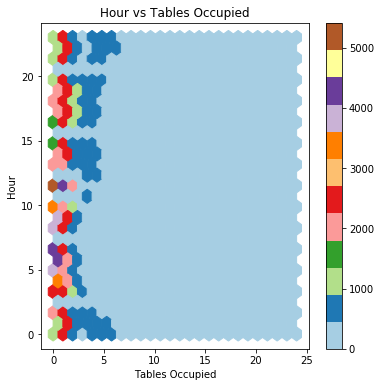

In [7]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.hexbin(x = 'TablesOcc', y = 'Hour', gridsize = 25, ax = ax, cmap='Paired')
ax.set_title('Hour vs Tables Occupied') # Give the plot a main title
ax.set_ylabel('Hour') # Set text for y axis
ax.set_xlabel('Tables Occupied') # Set text for x axis

***
**Note:** This finding lead us to the conclusion that the most busiest time (height number of tables's been occupied) for this casino is between 20 - 2 which translated to 8 PM - 2 AM.
***

- ### Heat Maps
Based on the 1st plot, we know about what time most gamblers will come to this casino. In this plot, what I tried to find out is the relationship between **Day of Week** and **Tables Open**. I'd like to know in what day of the week the casino open the most number of tables for the customer.

In [8]:
# Create TableOpen_bin which is a new feature based on the TablesOpen column with bin capacity = 20
headcount_df.loc[:, 'TablesOpen_bin'] = pd.cut(headcount_df.loc[:, 'TablesOpen'], bins = 20, labels = range(20))
headcount_df.loc[:, 'TablesOpen_bin'].head(10) # Display the first 10 rows for this new column

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: TablesOpen_bin, dtype: category
Categories (20, int64): [0 < 1 < 2 < 3 ... 16 < 17 < 18 < 19]

In [9]:
dayOfWeek_TableOpened = pd.crosstab(headcount_df.loc[:, 'TablesOpen_bin'], headcount_df.loc[:, 'DayOfWeek']) # Create frequency table between TableOpen_bin and DayOfWeek column
num_TableClosed = dayOfWeek_TableOpened.apply(sum, axis = 0) # number of table closed in each bin, axis = 0 for rows (TablesOpen bin)
dayOfWeek_TableOpened = dayOfWeek_TableOpened.div(num_TableClosed, axis = 1) # columns are the day of week
print(dayOfWeek_TableOpened.head(10)) # Display the first 10 rows for this crosstab

DayOfWeek              1         2         3         4         5         6  \
TablesOpen_bin                                                               
0               0.529626  0.593332  0.618874  0.623998  0.613301  0.567963   
1               0.120951  0.138679  0.141258  0.140475  0.137099  0.113264   
2               0.043658  0.073847  0.067154  0.068273  0.067909  0.049285   
3               0.087195  0.063061  0.058043  0.053400  0.058614  0.075109   
4               0.134982  0.066053  0.054980  0.054001  0.062099  0.115306   
5               0.008339  0.011455  0.012017  0.012468  0.011979  0.007927   
6               0.005693  0.007125  0.005694  0.005412  0.004046  0.005125   
7               0.007016  0.002952  0.001924  0.002526  0.003446  0.006806   
8               0.005933  0.002086  0.002081  0.002766  0.002604  0.004244   
9               0.022170  0.010550  0.008325  0.008499  0.010216  0.021620   

DayOfWeek              7  
TablesOpen_bin            
0        

Text(0.5, 1.0, 'Table Open ranges by Day of Week')

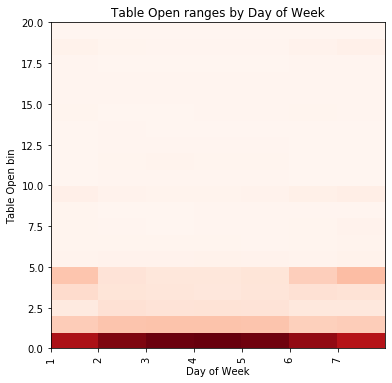

In [10]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
ax.pcolor(dayOfWeek_TableOpened, cmap = 'Reds')
ax.set_xticks(range(dayOfWeek_TableOpened.shape[1])) # shape[1] is the number of columns
ax.set_xticklabels(dayOfWeek_TableOpened.columns, rotation=90)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Table Open bin')
ax.set_title('Table Open ranges by Day of Week')

***
**Note:** This finding lead us to the conclusion that the casino tend to open more tables on weekend (6, 7, 1 which translated to Friday, Saturday and Sunday). That's pretty make sense since most people are off on weekends.
***

- ### Line Plot
In this plot, I'd like to virtually see the amount of visitors (gamblers) came to this casino as a time line.

In [11]:
headcount_df.loc[:, 'Date'] = pd.to_datetime(headcount_df.loc[:, 'DateFormat']) # Create a new column to store dateTime by converting string to DateTime oject
headcount_df.set_index('Date', inplace = True)
print(headcount_df.head()) # Show first 10 rows
print(headcount_df.tail()) # Show last 10 rows

           GameCode DateFormat  Hour  TablesOcc  TablesOpen  TablesClosed  \
Date                                                                        
2011-09-16       BA  9/16/2011     6          0           0             1   
2011-09-16       BA  9/16/2011     7          0           0             1   
2011-09-16       BA  9/16/2011     8          0           0             1   
2011-09-16       BA  9/16/2011     9          0           0             1   
2011-09-16       BA  9/16/2011    10          0           1             0   

            HeadCount  DayOfWeek  DayNumber TablesOpen_bin  
Date                                                        
2011-09-16          0          6         47              0  
2011-09-16          0          6         47              0  
2011-09-16          0          6         47              0  
2011-09-16          0          6         47              0  
2011-09-16          0          6         47              0  
           GameCode  DateFormat  

Text(0.5, 1.0, 'Time series of HeadCount')

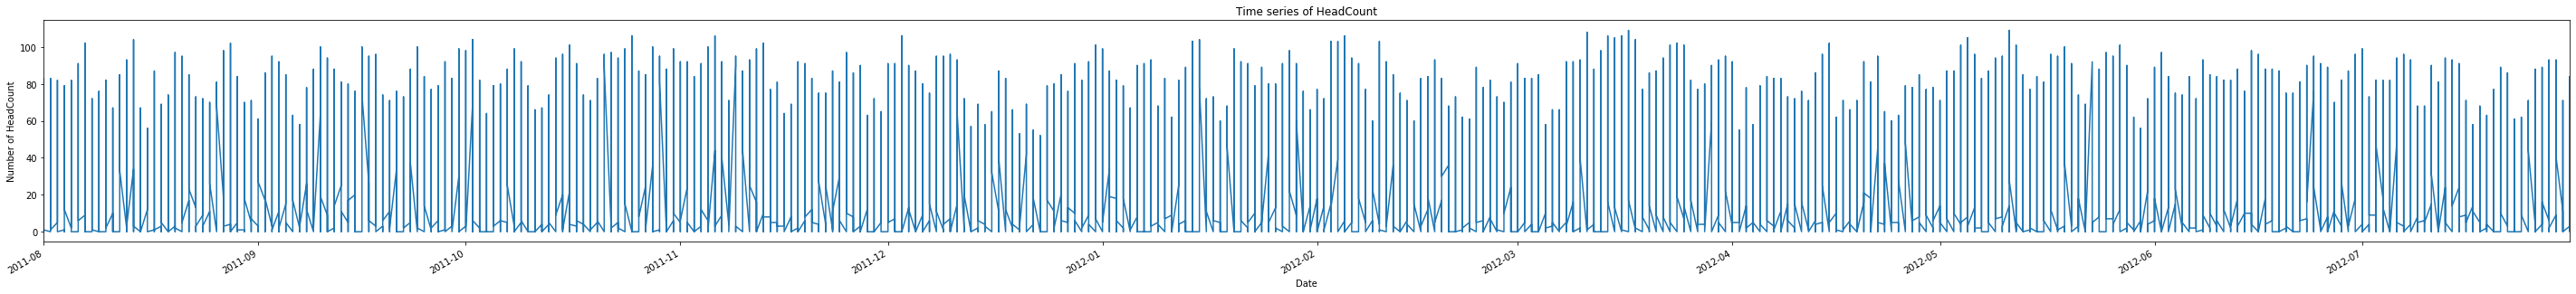

In [12]:
ax = plt.figure(figsize=(50, 5)).gca() # define axis
headcount_df.loc[:, 'HeadCount'].plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of HeadCount')
ax.set_title('Time series of HeadCount')

***
**Note:** This finding didn't tell us any useful information about the trend. Seems like this casino always has a lot of visitors through out the year between 2011 to 2012.
***

- ### Multiple Dimensions Plot with Color
In this plot, I'd like to see what kind of games people palying the most. I also use color to represent the day of the week to see gamblers are playing those games in what day of the week.

Text(0.5, 1, 'HeadCount vs. GameCode \n with DayOfWeek by color')

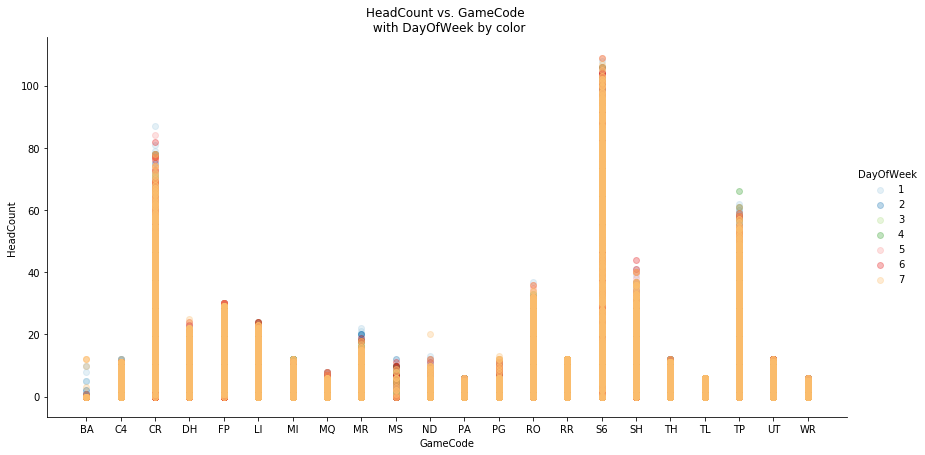

In [13]:
sns.lmplot(x = 'GameCode', y = 'HeadCount', 
           data = headcount_df, 
           hue = "DayOfWeek", 
           palette="Paired", 
           scatter_kws={'alpha':0.3},
           fit_reg = False,
           size=6, 
           aspect=2)
plt.xlabel('GameCode')
plt.ylabel('HeadCount')
plt.title('HeadCount vs. GameCode \n with DayOfWeek by color')

***
**Note:** This finding tell us that the top three popular games people playing the most are:
1. S6: Big Six
2. CR: Craps
3. TP: Texas Hold'em Poker

We also found out that most people came to play those games on day 7 (Saturday). Not to be so surprise.
***

- ### Scatter Plot with Colors, Marker Shape
Based on what we found on the plot above, let focus on those three games. In what hours of the day gamblers are playing what games by using marker with color and shapes to differentiate those games apart. 

Text(0.5, 1.0, 'HeadCount vs. Hour \n DayOfWeek by color \n GameCode as marker shape')

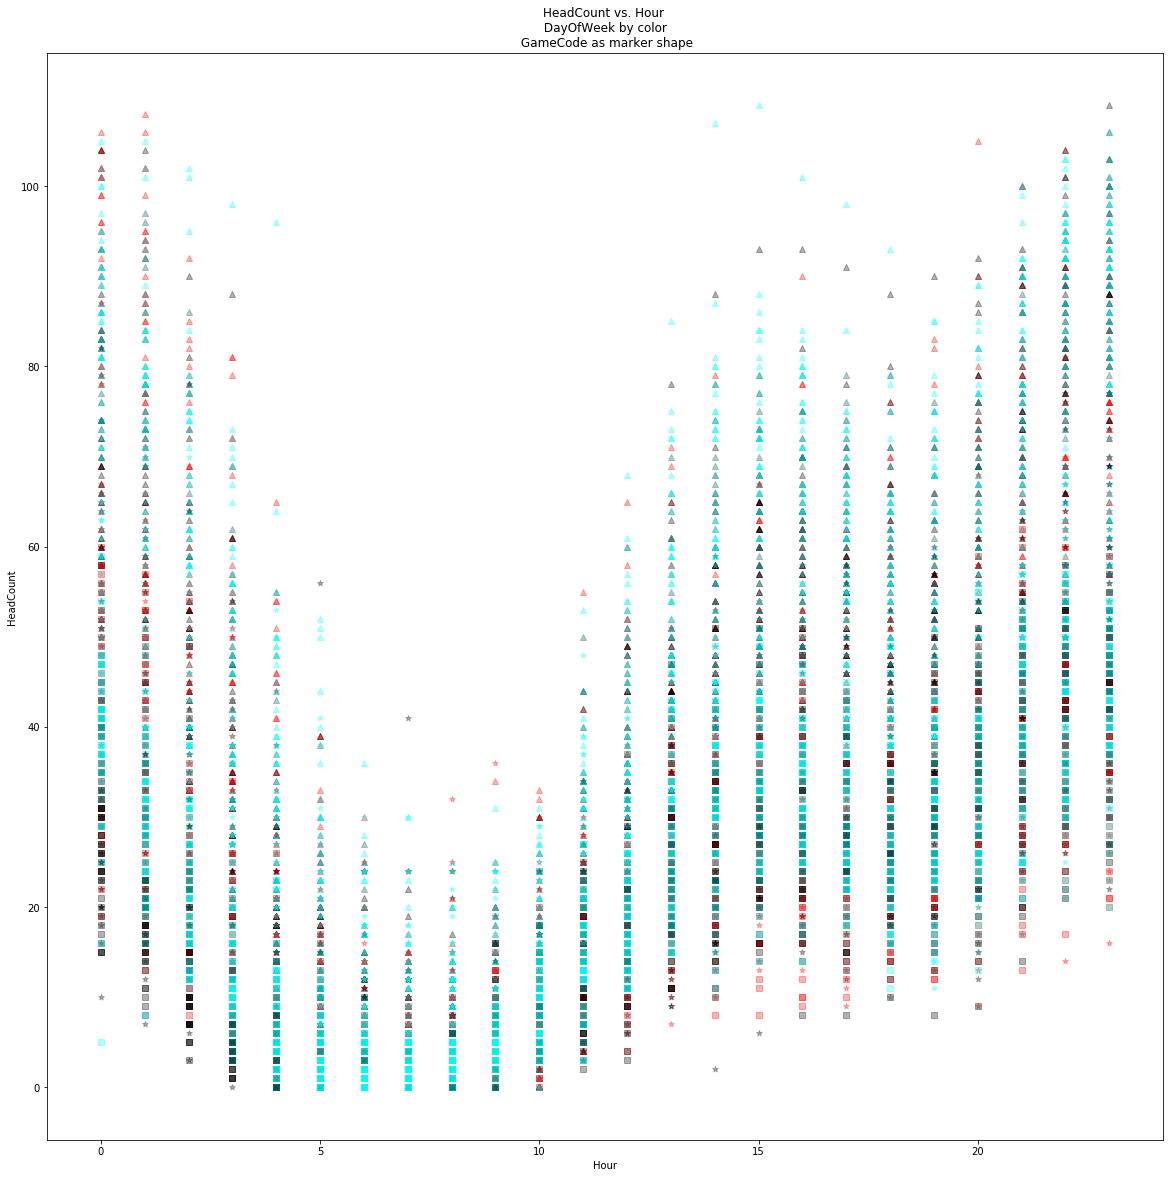

In [14]:
markers = {'S6':'^', 'CR':'*', 'TP': 's'} # S6 = triangle up, CR = stat, TP = square
days = {1:'red', 6:'black', 7:'cyan'} # Sunday = red, Saturday = cyan, Friday = black

ax = plt.figure(figsize=(20, 20)).gca() # define axis
for val1 in markers: # iterate over dictioary keys
    for val2 in days: # iterate over dictionary keys
        temp = headcount_df.loc[(headcount_df.loc[:, 'GameCode'] == val1) & (headcount_df.loc[:, 'DayOfWeek'] == val2), :]
        sns.regplot(x = 'Hour', y = 'HeadCount', 
                    data = temp,  
                    fit_reg = False, 
                    scatter_kws={'color': days[val2],
                                 'alpha':0.3},
                    marker = markers[val1],
                    ax = ax)
plt.xlabel('Hour')
plt.ylabel('HeadCount')
plt.title('HeadCount vs. Hour \n ' + 
          'DayOfWeek by color \n ' + 
         'GameCode as marker shape')

***
**Note:** This finding lead us to the conclusion that most people will play these three games on the weekends (Friday, Saturday and Sunday) in the casino throughout the day but at peak after Hour = 20 (after 8 PM). During 6 - 9 AM is the time frame that the casino will have least gamblers to play those games.
***

- ### Facet Plot
In this plot, we use Facet plot on DayOfWeek and GameCode (categorical) and HeadCount (numeric) variables to virtually see the overall data in order to find an interesting relationship. 

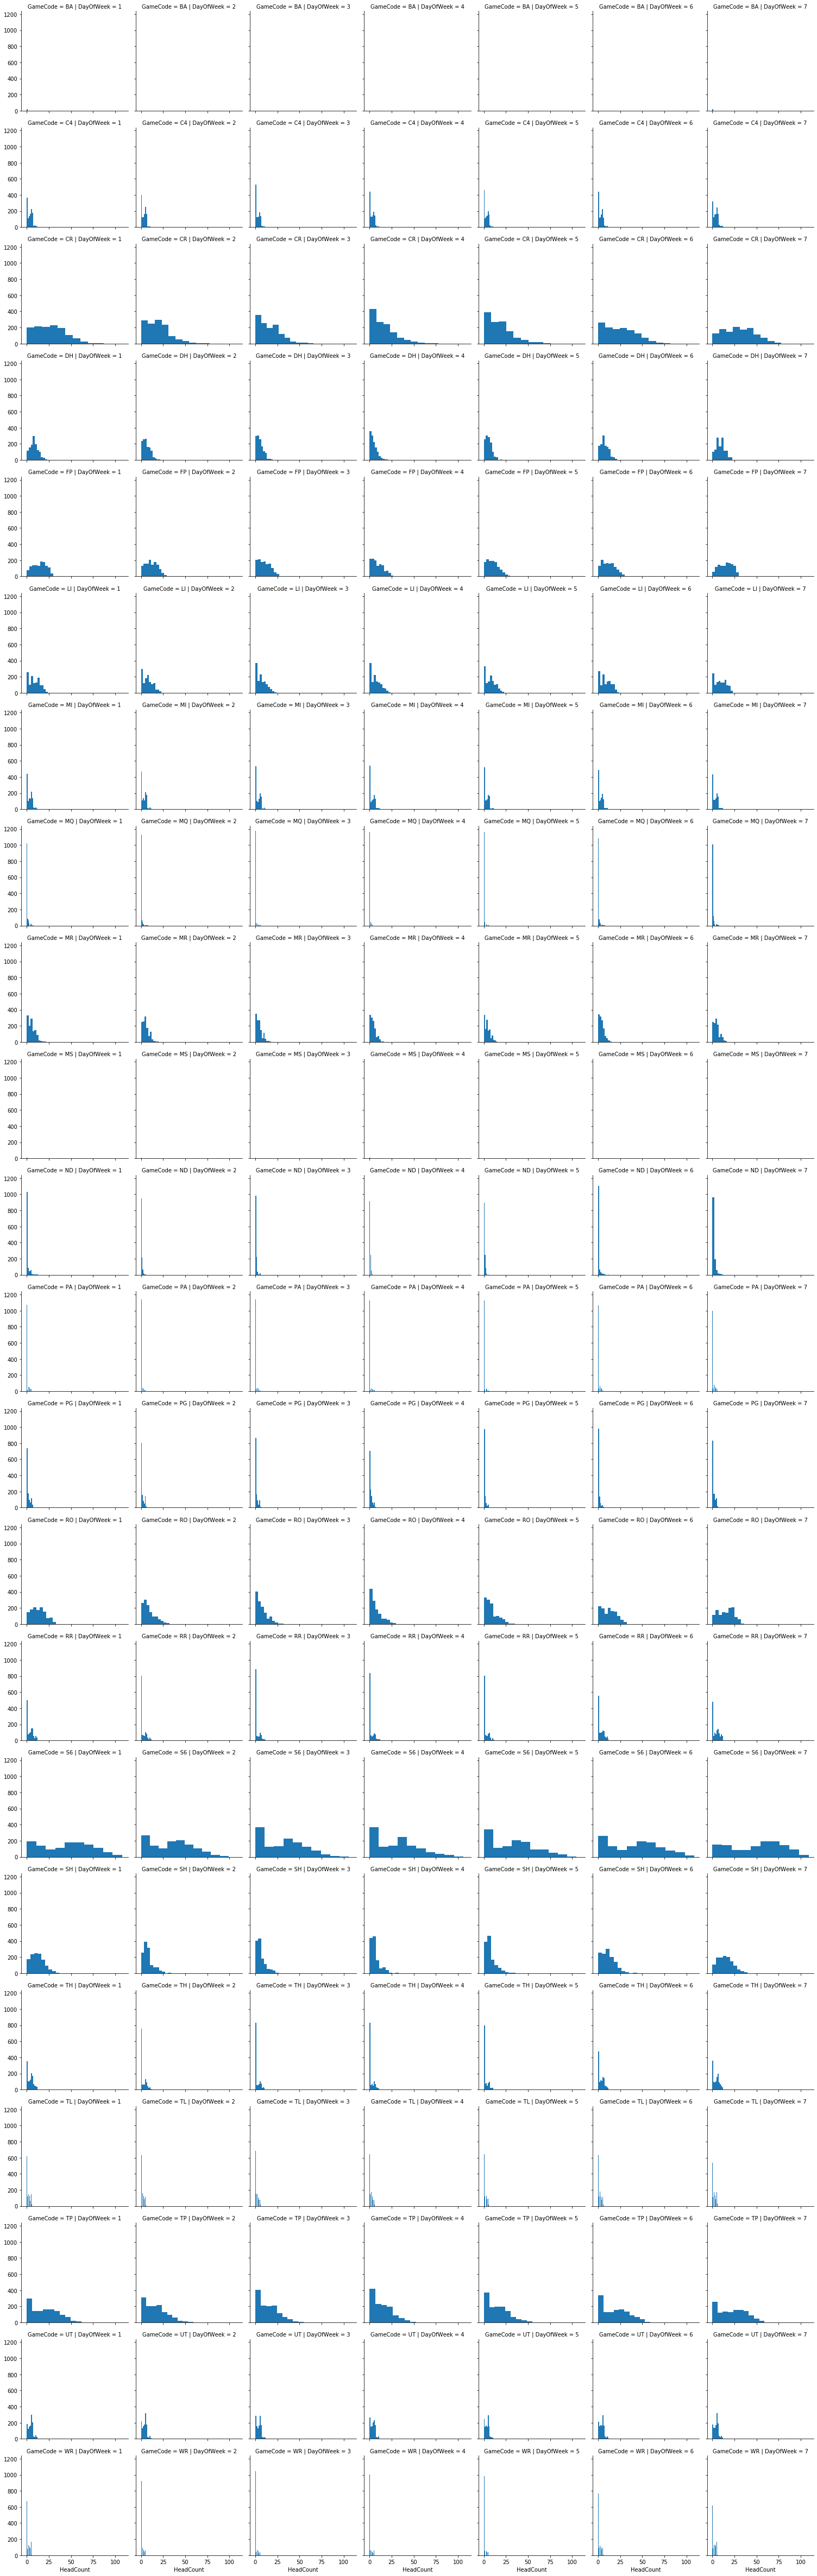

In [17]:
g = sns.FacetGrid(headcount_df, col="DayOfWeek", row='GameCode')
g = g.map(plt.hist, "HeadCount")

***
**Note:** This Facet plot gave us a very granular details for the popularity of each games on each day of the week. 

We can see that very few people playing this game such as MS (Mississippi Stud), BA (Baccarat), MQ (Blackjack variant), ND Blackjack variant) and  PA (Pai Gow Tiles). May be the casino should consider remove those games to save cost.
***